Given an orthonormal basis $\cal B=\{u_1,\ldots,u_k\}$ for a subspace $U\subseteq V$, we define the projection of $v\in V$ onto $U$ by
$$
\text{proj}_U(v)=\sum_{i=1}^k\langle v,u_i\rangle u_i
$$



In [22]:
def proj(C, ip, v):
    '''
    The assumption is that the basis C is orthonormal.
    '''
    return sum([ip(v,u)*u for u in C])

Gram-Schmidt is then easily implemented recursively by successively projecting the next vector in a set onto the span of the previous vectors and normalizing the part left over.

Note in the following adding extra vectors does not prevent this from working correctly. The result of GS will be an orthonormal basis.

In [23]:
def GS(B, ip):
    if len(B) == 1:
        b = B[0]
        return [b/sqrt(ip(b,b))]
    else:
        C = GS(B[:-1], ip)
        b = B[-1] - proj(C, ip, B[-1])
        if ip(b,b) != 0:
            return C + [b/sqrt(ip(b,b))]
        return C

Set your basis of functions.


In [24]:
B = [1, x, x^2, x^3] # B = [x^i for i in range(4)]

Run Gram\-Schmidt to get an orthonormal basis.


In [25]:
C = GS(B, lambda u, v: integral(u*v, x, 0, 1))

Set the function you want to project onto the basis.


In [26]:
h = x^(1/3)

Plot and show the results. 


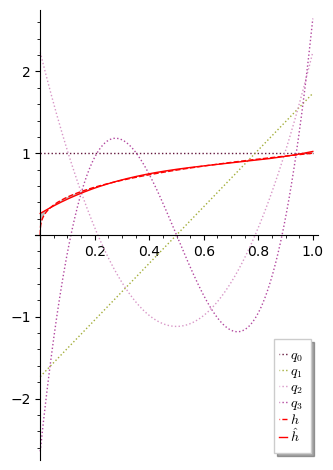

\(q_0 = 1\)<br>\(q_1 = 2 \, \sqrt{3} x - \sqrt{3}\)<br>\(q_2 = 6 \, \sqrt{5} x^{2} - 6 \, \sqrt{5} x + \sqrt{5}\)<br>\(q_3 = 20 \, \sqrt{7} x^{3} - 30 \, \sqrt{7} x^{2} + 12 \, \sqrt{7} x - \sqrt{7}\)<br>\(h = x^{\frac{1}{3}}\)<br>\(\hat h = \frac{15}{13} \, x^{3} - \frac{216}{91} \, x^{2} + \frac{180}{91} \, x + \frac{24}{91}\)<br>

In [27]:
# Plot the basis functions
text = ""
G = Graphics()
for i in range(len(C)):
    text += "$q_%d = %s$<br>"%(i,latex(C[i].simplify_full()))
    G += plot(C[i],(0,1),legend_label="$q_%d$"%i, rgbcolor=[random() for i in range(3)], linestyle=":")

# Project the function onto the basis
hat_h = proj(C, lambda u, v: integral(u*v, x, 0, 1), h)

# Add the plots of the function to project and its projection
G += plot(h,(0,1),legend_label="$h$", color="red",linestyle="--")
G += plot(hat_h,(0,1),legend_label="$\\hat h$", color="red",fill=h)
text += "$h = %s$<br>"%(latex(h))
text += "$\\hat h = %s$<br>"%(latex(hat_h.simplify_full()))

# Display the plot
G.show(aspect_ratio=0.3)
html(text)

Given a basis $\cal B=\{u_1,\ldots,u_n\}$ and an inner product $\langle u,v\rangle$ we see that if $[u]_{\cal B}=(\alpha_1,\ldots,\alpha_n)$ and $[v]_{\cal B}=(\beta_1,\ldots,\beta_n)$, then
$$\langle u,v\rangle=[v]_{\cal B}^TA[u]_{\cal B}$$
where
$$A_{i,j}=\langle u_j,u_i\rangle$$



To embed the above calculation into $\mathbb R^n$ where $n-1$ is the number of basis elements we must add the function \$h\$.



In [28]:
B = B + [h]
show(B)

[1, x, x^2, x^3, x^(1/3)]

In [30]:
A = matrix([[integral(B[i]*B[j],x, 0, 1) for j in range(len(B))] for i in range(len(B))])
show(A)

[   1  1/2  1/3  1/4  3/4]
[ 1/2  1/3  1/4  1/5  3/7]
[ 1/3  1/4  1/5  1/6 3/10]
[ 1/4  1/5  1/6  1/7 3/13]
[ 3/4  3/7 3/10 3/13  3/5]

Run Gram-Schmidt $\mathbb R^n$ using the inner-product $\langle u,v\rangle_A=v^TAu$. 



In [35]:
E = list(matrix.identity(len(B)))
D = GS(E, lambda u, v: v*A*u)

In [36]:
for b in D:
    show(b.simplify_full())

(1, 0, 0, 0, 0)

(-sqrt(3), 2*sqrt(3), 0, 0, 0)

(sqrt(5), -6*sqrt(5), 6*sqrt(5), 0, 0)

(-sqrt(7), 12*sqrt(7), -30*sqrt(7), 20*sqrt(7), 0)

(-4*sqrt(5)*sqrt(3), -30*sqrt(5)*sqrt(3), 36*sqrt(5)*sqrt(3), -35/2*sqrt(5)*sqrt(3), 91/6*sqrt(5)*sqrt(3))

Verify that the projection of $h$, now codded by $(0,0,0,\cdots,1)$ (in $\mathbb R^n$) agrees with what we computed above.

In [39]:
hat_h = proj(D[:-1], lambda u, v: v*A*u, E[-1])
show(hat_h*vector(B))

15/13*x^3 - 216/91*x^2 + 180/91*x + 24/91

Here are a couple of cells to play in if you want.